In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [23]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0     #Görüntüleri 0-1 arasında normalize edilir.
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0

In [24]:
#one-hot-encoding yapılır. 0-9 rakamları 10 boyutlu vektöre çevrilir.
#Örneğin 3 = [0,0,0,1,0,0,0,0,0,0]
y_train = to_categorical(y_train, 10)  # (60000,10)
y_test = to_categorical(y_test, 10) 
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")

x_train shape: (60000, 28, 28, 1), y_train shape: (60000, 10)


In [25]:
#Model oluşturma
model = Sequential ([
    Conv2D(32, (3,3),activation = 'relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation ='relu'),
    Dense(10,activation='softmax')
])

model.summary()  #Modele ait katman ve parametrelere bakılabilir.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [26]:
#Model derleme
model.compile(optimizer ='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [27]:
#Model eğitimi

history = model.fit(x_train,y_train,
                    epochs = 5,
                    batch_size= 32,
                    validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1449 - accuracy: 0.9548 - val_loss: 0.0624 - val_accuracy: 0.9823
Epoch 2/5
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0443 - val_accuracy: 0.9868
Epoch 3/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0434 - val_accuracy: 0.9862
Epoch 4/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0433 - val_accuracy: 0.9880
Epoch 5/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0388 - val_accuracy: 0.9887


In [31]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test doğruluk oranı: {test_acc:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0296 - accuracy: 0.9903
Test doğruluk oranı: 0.9903


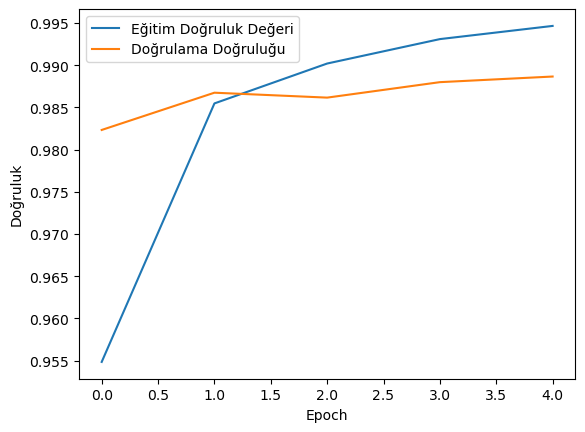

In [32]:
plt.plot(history.history['accuracy'],label = 'Eğitim Doğruluk Değeri')
plt.plot(history.history['val_accuracy'],label = 'Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [33]:
import numpy as np 

predictions= model.predict(x_test)


313/313 [==============================] - 1s 3ms/step


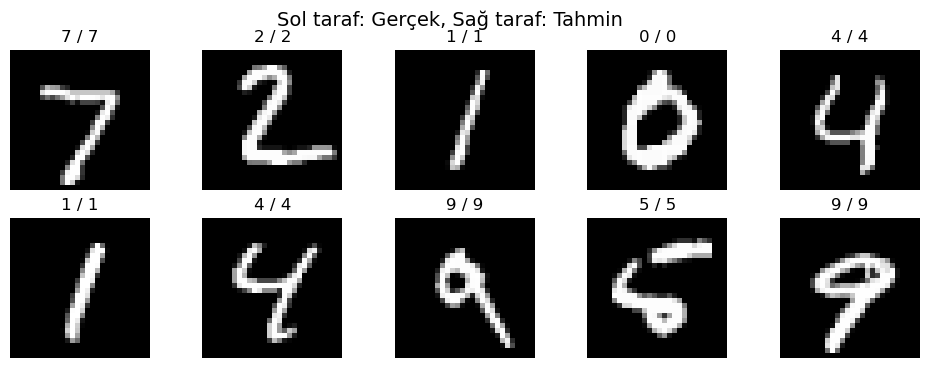

In [38]:
plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    gerçek = np.argmax(y_test[i])
    tahmin = np.argmax(predictions[i])
    # Başlığı daha okunaklı yapıyoruz: "Gerçek/Tahmin"
    plt.title(f"{gerçek} / {tahmin}", fontsize=12)
plt.suptitle("Sol taraf: Gerçek, Sağ taraf: Tahmin", fontsize=14)
plt.show()

In [42]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import cv2

In [50]:
img_path = '/home/seymaaksu/images.png'
img = Image.open(img_path).convert('L')  # Gri tonlamaya çevirilir.
img = img.resize((28, 28))  # 28x28 boyutuna getirilir.

# Numpy array'e çevirilir  ve normalize edilir.
img_array = np.array(img) / 255.0

# Modelin beklediği shape'e getirilir: (1,28,28,1)
img_array = img_array.reshape(1, 28, 28, 1)

# Tahmin yapılır.
prediction = model.predict(img_array)
print("Tahmin edilen rakam:", np.argmax(prediction))


1/1 [==============================] - 0s 28ms/step
Tahmin edilen rakam: 7


In [53]:
img_path = '/home/seymaaksu/images3.png'
img = Image.open(img_path).convert('L')  # Gri tonlamaya çevirilir.
img = img.resize((28, 28))  # 28x28 boyutuna getirilir.

# Numpy array'e çevirilir ve normalize edilir.
img_array = np.array(img) / 255.0

# Modelin beklediği shape'e getirilir: (1,28,28,1)
img_array = img_array.reshape(1, 28, 28, 1)

# Tahmin yapılır
prediction = model.predict(img_array)
print("Tahmin edilen rakam:", np.argmax(prediction))


1/1 [==============================] - 0s 25ms/step
Tahmin edilen rakam: 8
